# 1. Frame the problem

Firstly The titanic problem is a supervised problem and classifier problem (1 is survived 0 is not survived) and this is a batch learning as well because no continous flow of data

#  2. Get the data

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

train_data=pd.read_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\train.csv")
test_data=pd.read_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


from the test_data , we can see that our goal is to predict the survival of each test passenager

from the overall view of the data we can see 'age' and 'cabin' and 'embarked' has the data missing , later we will find methods to fix that

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


now before preprocessing the dataset, we want to split our train-set into train-set and develop-set. so we apply the train_test_split from sklearn.model_selection directly

In [5]:
from sklearn.model_selection import train_test_split

train_set, dev_set = train_test_split(train_data, test_size=0.2, random_state=42)
dev_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


This seems fine but let us looks at the data set size there are 891 samples in total and there might be bias

it seems that Pclass will be a important fearture, so I have to ensure in the develop-set is representive of varies categories of Pclass in the whole dataset  (How about other features?)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_data, train_data["Pclass"]):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]


now we can have a test on our dataset

In [7]:
def Pclass_proportions(data):
    return data["Pclass"].value_counts() / len(data)

train_set, dev_set = train_test_split(train_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": Pclass_proportions(train_data),
    "Stratified": Pclass_proportions(strat_test_set),
    "Random": Pclass_proportions(dev_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [8]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1,0.242424,0.296089,0.240223,22.136872,-0.907821
2,0.206510,0.184358,0.206704,-10.726864,0.094122
3,0.551066,0.519553,0.553073,-5.718577,0.364096


compare with Rand. %error and Strat. %error, it seems I successfully lower the error

# 3. Exploring the data

In [9]:
train_set=strat_train_set.copy()

'name' can be dropped out because we already have the id and name seems to be no use here

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 820 to 144
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            574 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          161 non-null object
Embarked       710 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


then we apply the corr_matrix to find the reletionship between differet numerical features( categorical features see later)

In [11]:
corr_mat=train_set.corr()

from the dataset we could see that Pclass and fare has strong correlation with survived,age ;SibSp,  Parch didn't see much correlation with Survived, then we see we could divided ages into bands

In [12]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


we can see there are five groups in total, 0-16,16-32,32-48,48-64,64-80,later we transfer ages into 5 groups

In [13]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


later in the pipeline we will create the new feature isAlone

In [14]:
train_data['isAlone']=0
train_data.loc[train_data['FamilySize']==1,'isAlone']=1

train_data[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


so as Fare ,we can divided into band 

In [15]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


then we analysis the 'ticket'

In [16]:
ticket=train_data['Ticket'].value_counts()
ticket=pd.DataFrame(ticket)
ticket_common=ticket[ticket['Ticket']>1]
ticket_not=ticket[ticket['Ticket']==1]
ticket_common.index

Index(['CA. 2343', '347082', '1601', 'CA 2144', '3101295', '347088',
       'S.O.C. 14879', '382652', '113760', '349909',
       ...
       '244367', '11668', '113505', '31027', '36928', '113789', '345764',
       'PC 17569', '113798', '36973'],
      dtype='object', length=134)

In [17]:
train_data=train_data.replace({'Ticket':ticket_common.index.values},1)
train_data=train_data.replace({'Ticket':ticket_not.index.values},0)
train_data['Ticket'].value_counts()

0    547
1    344
Name: Ticket, dtype: int64

In [18]:
train_data[['Ticket','Survived']].groupby(['Ticket'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Ticket,Survived
1,1,0.520349
0,0,0.297989


In [19]:
train_data=pd.read_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Now We have a look at categorical features and analysis the relation between them and survived

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001D6188C7780>>

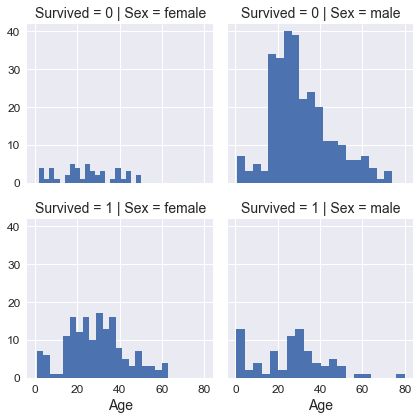

In [20]:
g = sns.FacetGrid(train_set, col='Sex',row='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend

We could roughly see that the female has larger probalilities to survive

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001D6188C74E0>>

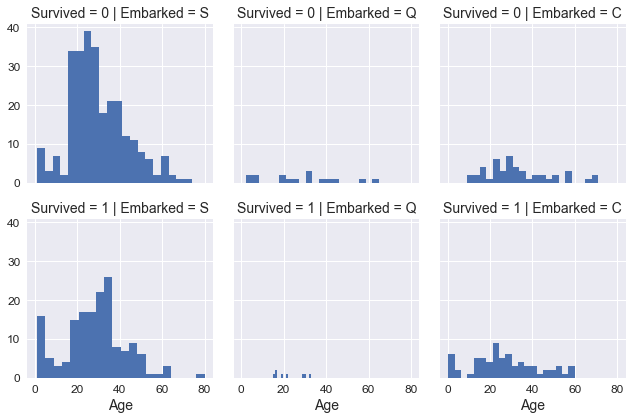

In [21]:
g = sns.FacetGrid(train_set, col='Embarked',row='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend

It seems embark has no correlation with survived,but when we combined the feature all

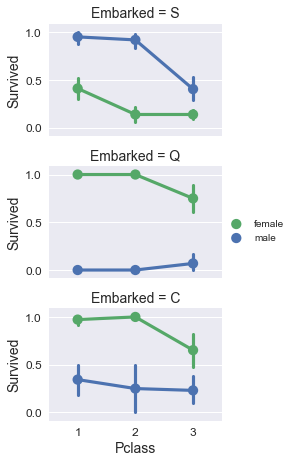

In [22]:
g = sns.FacetGrid(train_set,row='Embarked', size=2.2, aspect=1.6) # row=""means the titile
g.map(sns.pointplot,'Pclass','Survived', 'Sex',palette='deep') # the position is important, 'Pclass' is row, 'Survived' is column 
g.add_legend()

so we can see the male passengers embarked from S has higher probablities to survive comparing with other places,so we should add this into features

# 3. Preparing the data for machine learning

** In this part we have three things to do **
- 1. clean the data
- 2. handling with categorical features and set up new features
- 3. Build up the fit_transform pipeline

firstly we decided to drop the passenager ID(no use) , cabin(lost too much data) and Ticket(no correlation),but the name has titiles may transfered into a new feature

In [23]:
train_set=strat_train_set.copy()
train_set_labels=train_set["Survived"].copy()
train_set=train_set.drop(["Survived","PassengerId","Ticket"],axis=1)
train_set

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
820,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,93.5000,B69,S
439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,10.5000,NaN,S
821,3,"Lulic, Mr. Nikola",male,27.0,0,0,8.6625,NaN,S
403,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,15.8500,NaN,S
343,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,13.0000,NaN,S
514,3,"Coleff, Mr. Satio",male,24.0,0,0,7.4958,NaN,S
40,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,9.4750,NaN,S
101,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,7.8958,NaN,S
93,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,20.5750,NaN,S
81,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,9.5000,NaN,S


So does the develop set and test set

In [24]:
dev_set=strat_test_set.copy()
dev_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 12 columns):
PassengerId    179 non-null int64
Survived       179 non-null int64
Pclass         179 non-null int64
Name           179 non-null object
Sex            179 non-null object
Age            140 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int64
Ticket         179 non-null object
Fare           179 non-null float64
Cabin          43 non-null object
Embarked       179 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [45]:
dev_set_labels=dev_set["Survived"].copy()
dev_set=dev_set.drop(["Survived","PassengerId","Ticket"],axis=1)
test_set=test_data
test_set=test_set.drop(["PassengerId","Ticket"],axis=1)

KeyError: 'Survived'

In [26]:
attribs=list(train_set)
attribs

['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

Let's try to find the function to set up new feature Titles

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [28]:
class CreateFeatures(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X=X.drop('Name',axis=1)
        return X
        

In [29]:
def getEmbark(Embarked):
        if Embarked == "S":
            return 1
        elif Embarked == "C":
            return 2
        else:
            return 3

In [30]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["Embarked"] = X["Embarked"].fillna("S")
        X["embark"] = X["Embarked"].apply(getEmbark)
        X=X.drop("Embarked",axis=1)
        print(X)
        return X

now we design the pipeline for the numerical features

In [31]:
class Cat_to_Num_transfer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['Sex'] = X['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
        return X

In [32]:
class Missdata_clean(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X["Age"] = X["Age"].fillna(X["Age"].median())
        X["Fare"] = X["Fare"].fillna(X["Fare"].median())
        return X
    

In [33]:
class BandFeatures(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X.loc[X['Cabin'].isnull(),'Cabin']=0
        X.loc[X['Cabin'].notnull(),'Cabin']=1
        X.loc[ X['Age'] < 15, 'Age'] = 1
        #X.loc[(X['Age'] > 16) & (X['Age'] <= 32), 'Age'] = 1
        #X.loc[(X['Age'] > 32) & (X['Age'] <= 48), 'Age'] = 2
        #X.loc[(X['Age'] > 48) & (X['Age'] <= 64), 'Age'] = 3
        X.loc[ X['Age'] >= 15, 'Age']= 0
        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
        X=X.drop({'SibSp','Parch'},axis=1)
        X['Age'] = X['Age'].astype(int)
        X['Cabin'] = X['Cabin'].astype(int)
        print(X.columns)
        return X

        

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
full_pipeline=Pipeline([('selector',DataFrameSelector(attribs)),
                        ('create_feature',CreateFeatures()),
                       ('imputer',MostFrequentImputer()),
                       ('cat_to_num',Cat_to_Num_transfer()),
                        ('clean_data',Missdata_clean()),
                         ('band_features',BandFeatures())])
X_train=full_pipeline.fit_transform(train_set)
X_train


     Pclass     Sex   Age  SibSp  Parch      Fare    Cabin  embark
820       1  female  52.0      1      1   93.5000      B69       1
439       2    male  31.0      0      0   10.5000      NaN       1
821       3    male  27.0      0      0    8.6625      NaN       1
403       3    male  28.0      1      0   15.8500      NaN       1
343       2    male  25.0      0      0   13.0000      NaN       1
514       3    male  24.0      0      0    7.4958      NaN       1
40        3  female  40.0      1      0    9.4750      NaN       1
101       3    male   NaN      0      0    7.8958      NaN       1
93        3    male  26.0      1      2   20.5750      NaN       1
81        3    male  29.0      0      0    9.5000      NaN       1
459       3    male   NaN      0      0    7.7500      NaN       3
587       1    male  60.0      1      1   79.2000      B41       2
191       2    male  19.0      0      0   13.0000      NaN       1
312       2  female  26.0      1      1   26.0000      NaN    

,Pclass,Sex,Age,Fare,Cabin,embark,FamilySize
820,1,0,0,93.5000,1,1,3
439,2,1,0,10.5000,1,1,1
821,3,1,0,8.6625,1,1,1
403,3,1,0,15.8500,1,1,2
343,2,1,0,13.0000,1,1,1
514,3,1,0,7.4958,1,1,1
40,3,0,0,9.4750,1,1,2
101,3,1,0,7.8958,1,1,1
93,3,1,0,20.5750,1,1,4
81,3,1,0,9.5000,1,1,1


then combined 2 pipelines

In [36]:
y_train=train_set_labels
y_train

820    1
439    0
821    1
403    0
343    0
514    0
40     0
101    0
93     0
81     1
459    0
587    1
191    0
312    0
753    0
874    1
665    0
70     0
56     1
622    1
858    1
376    1
505    0
164    0
57     0
640    0
736    0
6      0
763    1
465    0
      ..
847    0
870    0
352    0
125    1
855    1
128    1
603    0
429    1
881    0
472    1
510    1
483    1
43     1
222    0
249    0
374    0
193    1
288    1
474    0
682    0
565    0
169    0
4      0
832    0
470    0
13     0
789    0
51     0
625    0
144    0
Name: Survived, Length: 712, dtype: int64

# find a ML mode and learn

In [37]:
from xgboost import XGBClassifier

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
xgb_clf=XGBClassifier(learning_rate=0.1, max_depth=2, 
silent=True, objective='binary:logistic')

In [39]:
#from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
# 设置boosting迭代计算次数
param_grid = {
    'n_estimators': range(30, 50, 2),
    'max_depth': range(2, 7, 1)
}
grid_clf = GridSearchCV(estimator = xgb_clf, param_grid = param_grid, scoring='accuracy', cv=5)

let's try on the dev set 

not bad, now we train on the whole set

In [40]:
train_data=pd.read_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\train.csv")
train_data=train_data.drop(['PassengerId',"Ticket"],axis=1)

In [41]:
y_full=train_data["Survived"]
X_full=train_data.drop("Survived",axis=1)
X_full=full_pipeline.transform(X_full)
X_full

     Pclass     Sex   Age  SibSp  Parch      Fare        Cabin  embark
0         3    male  22.0      1      0    7.2500          NaN       1
1         1  female  38.0      1      0   71.2833          C85       2
2         3  female  26.0      0      0    7.9250          NaN       1
3         1  female  35.0      1      0   53.1000         C123       1
4         3    male  35.0      0      0    8.0500          NaN       1
5         3    male   NaN      0      0    8.4583          NaN       3
6         1    male  54.0      0      0   51.8625          E46       1
7         3    male   2.0      3      1   21.0750          NaN       1
8         3  female  27.0      0      2   11.1333          NaN       1
9         2  female  14.0      1      0   30.0708          NaN       2
10        3  female   4.0      1      1   16.7000           G6       1
11        1  female  58.0      0      0   26.5500         C103       1
12        3    male  20.0      0      0    8.0500          NaN       1
13    

,Pclass,Sex,Age,Fare,Cabin,embark,FamilySize
0,3,1,0,7.2500,1,1,2
1,1,0,0,71.2833,1,2,2
2,3,0,0,7.9250,1,1,1
3,1,0,0,53.1000,1,1,2
4,3,1,0,8.0500,1,1,1
5,3,1,0,8.4583,1,3,1
6,1,1,0,51.8625,1,1,1
7,3,1,1,21.0750,1,1,5
8,3,0,0,11.1333,1,1,3
9,2,0,1,30.0708,1,2,2


In [42]:
grid_clf.fit(X_full, y_full)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81594, std: 0.00673, params: {'max_depth': 2, 'n_estimators': 30},
  mean: 0.81930, std: 0.00916, params: {'max_depth': 2, 'n_estimators': 32},
  mean: 0.82267, std: 0.00978, params: {'max_depth': 2, 'n_estimators': 34},
  mean: 0.82043, std: 0.01423, params: {'max_depth': 2, 'n_estimators': 36},
  mean: 0.82267, std: 0.01585, params: {'max_depth': 2, 'n_estimators': 38},
  mean: 0.82604, std: 0.01800, params: {'max_depth': 2, 'n_estimators': 40},
  mean: 0.82604, std: 0.01800, params: {'max_depth': 2, 'n_estimators': 42},
  mean: 0.82379, std: 0.01629, params: {'max_depth': 2, 'n_estimators': 44},
  mean: 0.82379, std: 0.01629, params: {'max_depth': 2, 'n_estimators': 46},
  mean: 0.82267, std: 0.01545, params: {'max_depth': 2, 'n_estimators': 48},
  mean: 0.82043, std: 0.01642, params: {'max_depth': 3, 'n_estimators': 30},
  mean: 0.81930, std: 0.01690, params: {'max_depth': 3, 'n_estimators': 32},
  mean: 0.81818, std: 0.01863, params: {'max_depth': 3, 'n_estimators': 34},

In [46]:
test_set=test_data.drop(["PassengerId","Ticket"],axis=1)
X_test=full_pipeline.transform(test_set)

     Pclass     Sex   Age  SibSp  Parch      Fare            Cabin  embark
0         3    male  34.5      0      0    7.8292              NaN       3
1         3  female  47.0      1      0    7.0000              NaN       1
2         2    male  62.0      0      0    9.6875              NaN       3
3         3    male  27.0      0      0    8.6625              NaN       1
4         3  female  22.0      1      1   12.2875              NaN       1
5         3    male  14.0      0      0    9.2250              NaN       1
6         3  female  30.0      0      0    7.6292              NaN       3
7         2    male  26.0      1      1   29.0000              NaN       1
8         3  female  18.0      0      0    7.2292              NaN       2
9         3    male  21.0      2      0   24.1500              NaN       1
10        3    male   NaN      0      0    7.8958              NaN       1
11        1    male  46.0      0      0   26.0000              NaN       1
12        1  female  23.0

In [47]:
y_pred=grid_clf.best_estimator_.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [48]:
submission=pd.DataFrame(test_data["PassengerId"])
submission.insert(1,'Survived',y_pred)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0


In [49]:
submission.to_csv("C:\\Users\\hasee\\workspace\\Kaggle\\Titanic\\submission8.csv")

In [ ]:
grid_clf.best_estimator_.feature_importances_

In [ ]:

feature=pd.DataFrame()
num_attr=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'IsAlone']
cat_attr=['Embarked', 'Title']
full_attr=num_attr+cat_attr
feature["features"]=full_attr
feature["importance"]=grid_clf.best_estimator_.feature_importances_
feature